In [17]:
import yfinance as yf
import pyfolio as pf
import pandas as pd

In [11]:
data = yf.Ticker("GS").history("max")

In [12]:
returns = data.Close.pct_change()

In [13]:
bench = yf.Ticker("SPY").history("max")
bench_returns = bench.Close.pct_change()

In [14]:
returns = returns.dropna()
bench_returns = bench_returns.dropna()

In [15]:
returns, bench_returns = returns.align(bench_returns, join="inner")

C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.271%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.643%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of p

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,78.84,2007-10-31,2008-11-20,2016-12-01,2372
1,54.59,2000-09-11,2002-10-09,2005-11-01,1342
2,48.75,2018-03-12,2020-03-23,2020-12-28,731
3,42.38,2000-03-24,2000-05-26,2000-08-28,112
4,32.84,2021-11-02,2022-06-17,2024-03-20,622


C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:1407: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


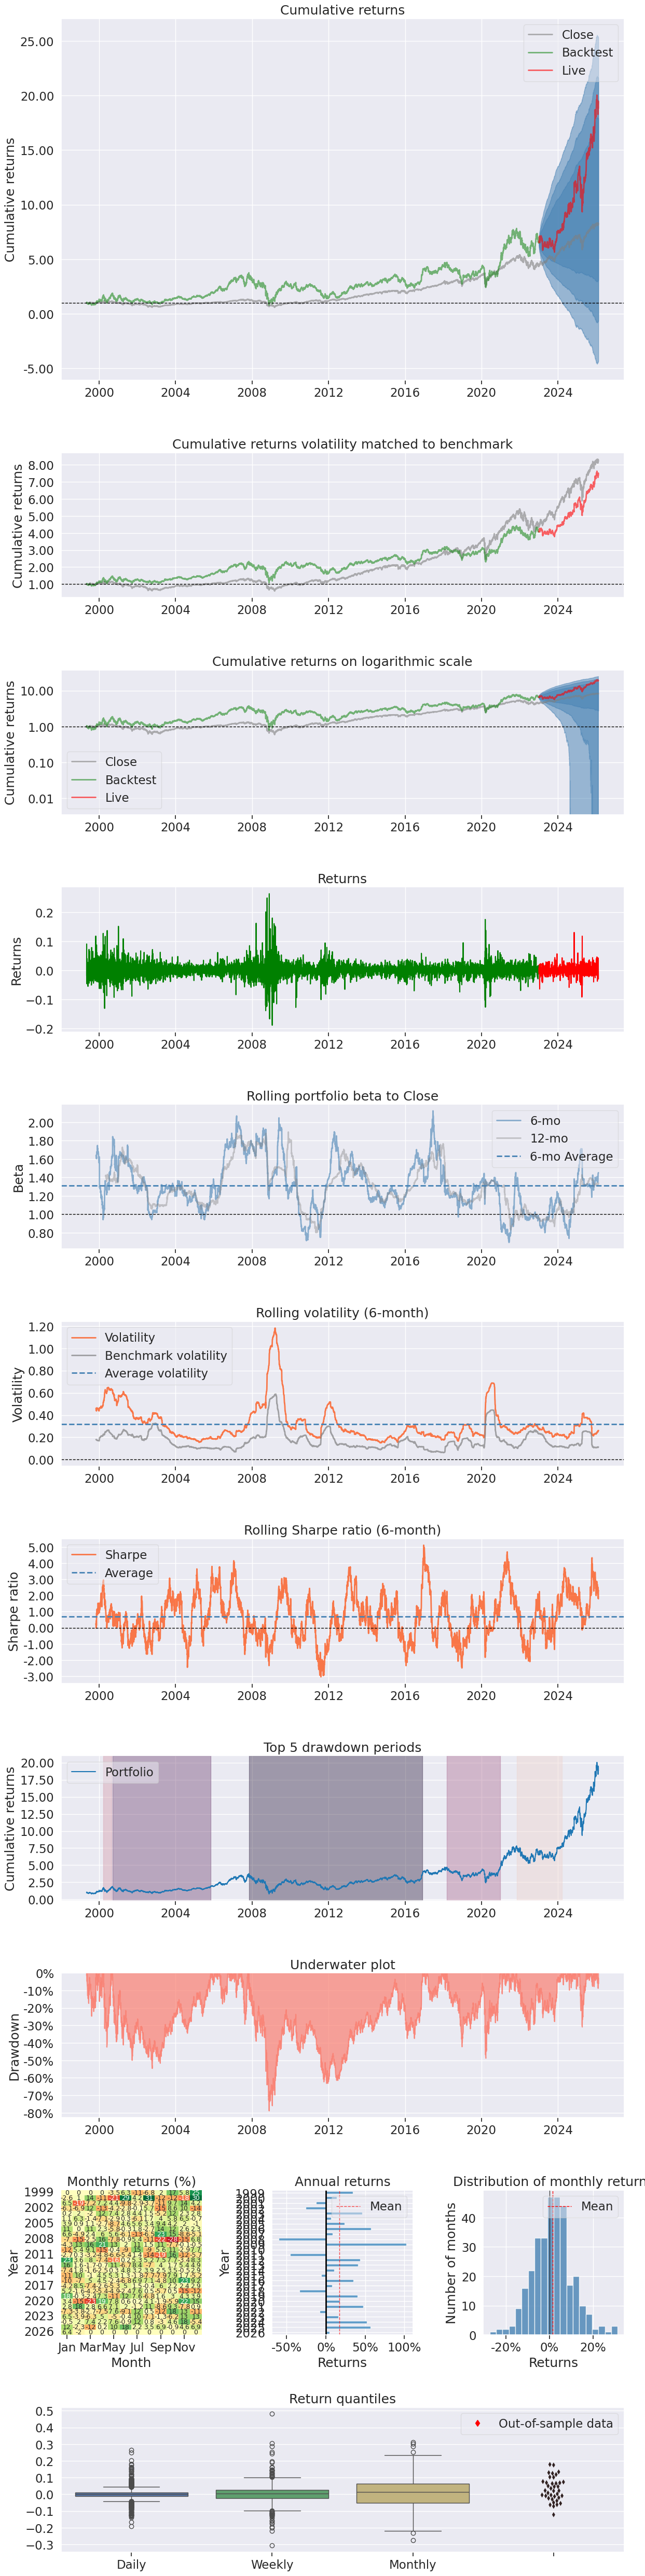

In [16]:
pf.create_returns_tear_sheet(returns, live_start_date = '2023-01-01', benchmark_rets = bench_returns)

In [19]:
tickers = ["NVDA", "GS", "MSFT"]
weights = pd.Series([.4, .4, .2], index= tickers)

In [22]:
prices = None

for t in tickers:
    h = yf.Ticker(t).history("max")[["Close"]].rename(columns={"Close":t})
    prices = h if prices is None else prices.join(h, how="inner")

In [23]:
prices

,NVDA,GS,MSFT
Date,,,
1999-05-04 00:00:00-04:00,0.033188,48.696548,23.842472
1999-05-05 00:00:00-04:00,0.033904,47.831623,24.166986
1999-05-06 00:00:00-04:00,0.033247,47.009911,23.804302
1999-05-07 00:00:00-04:00,0.033426,51.291397,24.147902
1999-05-10 00:00:00-04:00,0.033426,48.912781,24.338797
...,...,...,...
2026-02-06 00:00:00-05:00,185.410004,928.750000,401.140015
2026-02-09 00:00:00-05:00,190.039993,943.619995,413.600006
2026-02-10 00:00:00-05:00,188.539993,948.989990,413.269989


In [24]:
asset_returns = prices.pct_change().dropna()

In [28]:
returns = asset_returns.mul(weights).sum(axis=1)

In [29]:
returns, bench_returns = returns.align(bench_returns, join="inner")

C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.748%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70.037%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of 

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,75.04,2007-10-31,2008-11-20,2014-08-26,1780
1,67.13,2002-01-04,2002-10-09,2005-11-02,999
2,45.06,2000-09-01,2000-12-21,2001-04-20,166
3,44.02,2021-11-24,2022-10-14,2023-05-25,392
4,39.66,2018-09-04,2018-12-24,2019-12-16,335


C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\plotting.py:1391: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.swarmplot(
C:\Users\antho\AppData\Local\Programs\Python\Python311\Lib\site-packages\

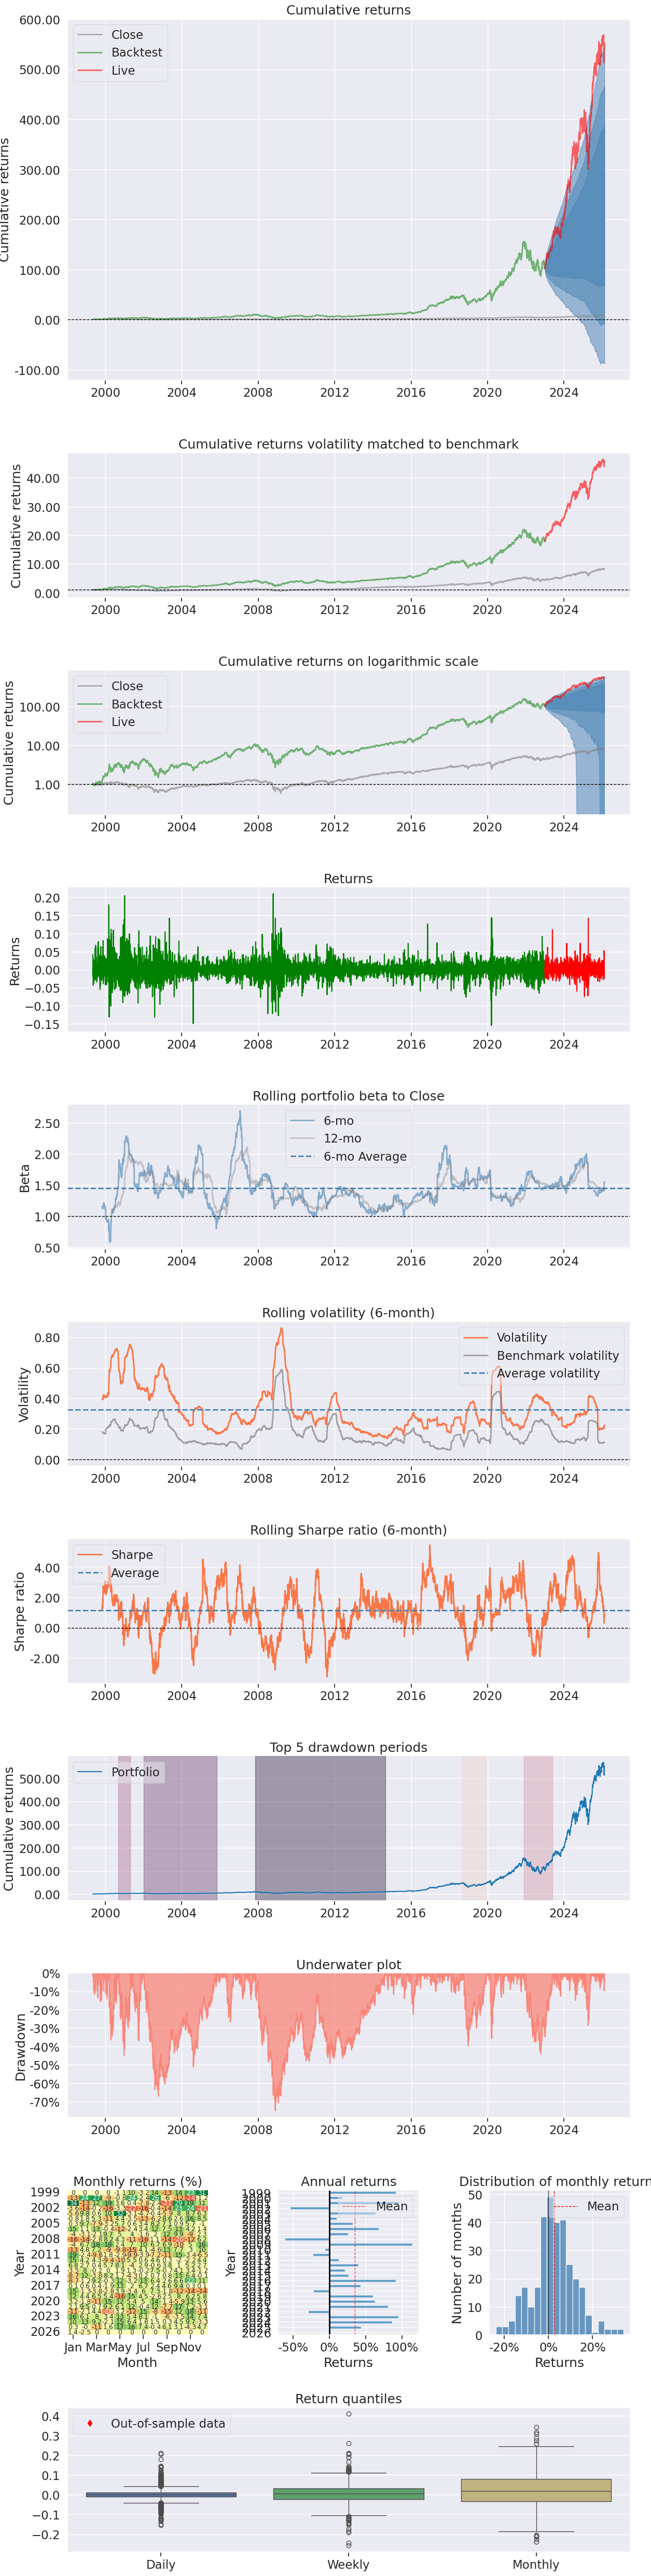

In [30]:
pf.create_returns_tear_sheet(returns, live_start_date = '2023-01-01', benchmark_rets = bench_returns)